## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = '/content/drive/My Drive/Colab Notebooks/Python/Lab/Lab 8/'

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [6]:
labels = pd.read_csv("labels.csv")
labels.sample(5)

,id,breed
4526,70f42c332a3a4f38c138e098b0eb45e9,giant_schnauzer
8032,c8d4d8654df681140522be0f3b1ba422,airedale
3119,4d11bd700573b78d223e9ff0ceb94f3a,english_foxhound
5144,81f5681a9e71dcccfeb64b104a22dfda,welsh_springer_spaniel
1975,30c517ade1f44b96635930c26430fc5e,norwegian_elkhound


### Print the count of each category of Dogs given in the dataset



In [7]:
labels["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

### Get one-hot encodings of labels

In [0]:
labels_one_hot = pd.Series(labels['breed'])
labels_one_hot = pd.get_dummies(labels_one_hot, sparse=True)
labels_one_hot = np.array(labels_one_hot)

In [9]:
labels_one_hot[5]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_row = 128
img_col = 128
num_channels = 1

In [11]:
from tqdm import tqdm
import cv2
X_train = []
y_train = []
i=0
for f, img in tqdm(labels.values):
  train_img = cv2.imread('/content/train/{}.jpg'.format(f),1)
  label = labels_one_hot[i]
  train_img_resize = cv2.resize(train_img,(img_row, img_col))
  X_train.append(train_img_resize)
  y_train.append(label)
  i+=1

100%|██████████| 10222/10222 [00:29<00:00, 346.90it/s]


In [12]:
y_train[2]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

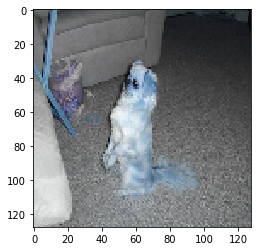

In [13]:
plt.imshow(X_train[2])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [14]:
X_train_data = np.array(X_train, np.float32)/255
print(X_train_data.shape)

(10222, 128, 128, 3)


In [15]:
y_train_data = np.array(y_train, np.float32)
print(y_train_data.shape)

(10222, 120)


### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_data, y_train_data, test_size=0.2, random_state = 5)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(8177, 128, 128, 3)
(2045, 128, 128, 3)
(8177, 120)
(2045, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
submission_df = pd.read_csv("sample_submission.csv")
test_img = submission_df["id"]
submission_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

Run the below code to load the test image files in x_test_feature

In [0]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_row, img_col)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:29<00:00, 349.18it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
X_test_data = np.array(x_test_feature, np.float32)/255
print(X_test_data.shape)

(10357, 128, 128, 3)


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPool2D, Flatten

In [0]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(BatchNormalization(input_shape=(128,128,3,)))
model.add(Conv2D(32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(120, activation='softmax'))

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 6s 674us/sample - loss: 4.8018 - accuracy: 0.0132 - val_loss: 4.7372 - val_accuracy: 0.0166
Epoch 2/10
8177/8177 [==============================] - 5s 586us/sample - loss: 4.5517 - accuracy: 0.0401 - val_loss: 4.5976 - val_accuracy: 0.0289
Epoch 3/10
8177/8177 [==============================] - 5s 592us/sample - loss: 4.1804 - accuracy: 0.0808 - val_loss: 4.4478 - val_accuracy: 0.0416
Epoch 4/10
8177/8177 [==============================] - 5s 596us/sample - loss: 3.4901 - accuracy: 0.1955 - val_loss: 4.5090 - val_accuracy: 0.0455
Epoch 5/10
8177/8177 [==============================] - 5s 597us/sample - loss: 2.3173 - accuracy: 0.4350 - val_loss: 5.0197 - val_accuracy: 0.0435
Epoch 6/10
8177/8177 [==============================] - 5s 603us/sample - loss: 1.0597 - accuracy: 0.7310 - val_loss: 6.3801 - val_accuracy: 0.0450
Epoch 7/10
8177/8177 [==============================] - 5s 599us

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from tensorflow.keras.layers import ZeroPadding2D
train_datagen = ImageDataGenerator(rotation_range=30,
                width_shift_range=0.2,
                height_shift_range=0.2,
                rescale = 1./255,
                horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255,
                width_shift_range=0.2,
                height_shift_range=0.2)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = train_datagen.flow(X_train, y=y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y=y_val, batch_size=32)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
model.fit(train_generator, steps_per_epoch=len(X_train)/32,epochs=10,validation_data=val_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 255.53125 steps, validate for 64 steps
Epoch 1/10
256/255 [==============================] - 37s 145ms/step - loss: 4.5057 - accuracy: 0.0346 - val_loss: 11.8286 - val_accuracy: 0.0083
Epoch 2/10
256/255 [==============================] - 37s 143ms/step - loss: 4.3722 - accuracy: 0.0506 - val_loss: 5.8301 - val_accuracy: 0.0117
Epoch 3/10
256/255 [==============================] - 36s 140ms/step - loss: 4.2962 - accuracy: 0.0602 - val_loss: 4.4394 - val_accuracy: 0.0386
Epoch 4/10
256/255 [==============================] - 36s 139ms/step - loss: 4.2403 - accuracy: 0.0629 - val_loss: 4.4497 - val_accuracy: 0.0494
Epoch 5/10
256/255 [==============================] - 35s 139ms/step - loss: 4.2127 - accuracy: 0.0703 - val_loss: 4.4238 - val_accuracy: 0.0494
Epoch 6/10
256/255 [==============================] - 35s 138ms/step - loss: 4.1576 - accuracy: 0.0728 - val_loss: 4.3740 - val_accuracy: 0.0523
Epoch 7/10
256/255 [==========

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [73]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
model_VGG = Sequential()
model_VGG.add(Flatten())
model_VGG.add(Dense(1024, activation='relu'))
model_VGG.add(Dense(256, activation='relu'))
model_VGG.add(Dense(120, activation='softmax'))

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in base_model.layers:
    layer.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
x = base_model.output

In [0]:
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [0]:
prediction = tf.keras.layers.Dense(120,activation='softmax')(x)

In [0]:
#Using Keras Model class
final_model = tf.keras.models.Model(inputs=base_model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

In [0]:
#Compile model
final_model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])

In [83]:
final_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=1)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 20s 2ms/sample - loss: 4.6721 - accuracy: 0.0327 - val_loss: 4.4945 - val_accuracy: 0.0606
Epoch 2/10
8177/8177 [==============================] - 16s 2ms/sample - loss: 4.2798 - accuracy: 0.1033 - val_loss: 4.2772 - val_accuracy: 0.1090
Epoch 3/10
8177/8177 [==============================] - 16s 2ms/sample - loss: 4.0073 - accuracy: 0.1697 - val_loss: 4.1030 - val_accuracy: 0.1325
Epoch 4/10
8177/8177 [==============================] - 16s 2ms/sample - loss: 3.8007 - accuracy: 0.2031 - val_loss: 3.9805 - val_accuracy: 0.1521
Epoch 5/10
8177/8177 [==============================] - 16s 2ms/sample - loss: 3.6302 - accuracy: 0.2354 - val_loss: 3.8845 - val_accuracy: 0.1589
Epoch 6/10
8177/8177 [==============================] - 16s 2ms/sample - loss: 3.4828 - accuracy: 0.2676 - val_loss: 3.8101 - val_accuracy: 0.1677
Epoch 7/10
8177/8177 [==============================] - 16s 2ms/sample

In [84]:
final_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, initial_epoch=10 ,batch_size=32, verbose=1)

Train on 8177 samples, validate on 2045 samples
Epoch 11/25
8177/8177 [==============================] - 16s 2ms/sample - loss: 2.9928 - accuracy: 0.3598 - val_loss: 3.5443 - val_accuracy: 0.2078
Epoch 12/25
8177/8177 [==============================] - 16s 2ms/sample - loss: 2.9150 - accuracy: 0.3790 - val_loss: 3.5231 - val_accuracy: 0.2064
Epoch 13/25
8177/8177 [==============================] - 17s 2ms/sample - loss: 2.8533 - accuracy: 0.3850 - val_loss: 3.4975 - val_accuracy: 0.2064
Epoch 14/25
8177/8177 [==============================] - 17s 2ms/sample - loss: 2.7925 - accuracy: 0.3978 - val_loss: 3.4880 - val_accuracy: 0.2108
Epoch 15/25
8177/8177 [==============================] - 17s 2ms/sample - loss: 2.7365 - accuracy: 0.4064 - val_loss: 3.4468 - val_accuracy: 0.2137
Epoch 16/25
8177/8177 [==============================] - 17s 2ms/sample - loss: 2.6828 - accuracy: 0.4149 - val_loss: 3.4343 - val_accuracy: 0.2176
Epoch 17/25
8177/8177 [==============================] - 17s 2ms